Работа с данными - чтение и запись CSV

In [13]:
import pandas as pd

# df = pd.read_csv("data/India_tourist_places.csv", on_bad_lines='skip')
df = pd.read_excel("data/India_tourist_places.xlsx")

df.to_csv("test.csv")
df.head()



,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit,Image URL
0,Western,Gujarat,Rann of Kutch,Rann Utsav,Cultural,Unknown,3.0,4.9,7500,Yes,NaN,Cultural,Yes,0.10,Evening,https://www.rannutsav.com/blog/wp-content/uplo...
1,Northern,Punjab,Amritsar,Golden Temple (Harmandir Sahib),Religious Site,1604,1.5,4.9,0,Yes,NaN,Spiritual,Yes,1.90,All,https://upload.wikimedia.org/wikipedia/commons...
2,Northern,Ladakh,Leh,Pangong Tso,Lake,Unknown,2.0,4.9,20,Yes,NaN,Nature,Yes,0.15,Morning,https://dynamic-media-cdn.tripadvisor.com/medi...
3,Western,Maharastra,Mumbai,Siddhivinayak Temple,Temple,1881,2.0,4.8,0,Yes,NaN,Religious,No,1.05,All,https://upload.wikimedia.org/wikipedia/commons...
4,Western,Gujarat,Somnath,Somnath Temple,Temple,1951,2.0,4.8,0,No,NaN,Religious,No,0.39,Morning,https://upload.wikimedia.org/wikipedia/commons...


Работа с данными - основные команды

In [ ]:
df.info()

print(df.describe().transpose())

cleared_df = df.drop(["Zone", "Entrance Fee in INR", "Image URL"], axis=1)
print(cleared_df.head())
print(cleared_df.tail())

sorted_df = cleared_df.sort_values(by="Name")
print(sorted_df.head())
print(sorted_df.tail())

In [30]:
print(df.loc[0:3, ["Name","Google review rating"]])

print(df.iloc[4:6, [3,7]])

                              Name  Google review rating
0                       Rann Utsav                   4.9
1  Golden Temple (Harmandir Sahib)                   4.9
2                      Pangong Tso                   4.9
3             Siddhivinayak Temple                   4.8
               Name  Google review rating
4    Somnath Temple                   4.8
5  Jallianwala Bagh                   4.8


In [41]:
print(df.groupby(["Type", "Significance"]).size().reset_index(name="Count"))

                   Type   Significance  Count
0       Adventure Sport      Adventure      1
1        Amusement Park  Entertainment      2
2        Amusement Park   Recreational      2
3                 Beach         Nature      3
4                 Beach   Recreational     14
..                  ...            ...    ...
97             Vineyard   Recreational      1
98         War Memorial     Historical      3
99            Waterfall         Nature     11
100  Wildlife Sanctuary       Wildlife      6
101                 Zoo       Wildlife      4

[102 rows x 3 columns]


In [ ]:
data = df[["Name", "Type", "Significance", "Weekly Off"]].copy()
data.dropna(subset=["Weekly Off"], inplace=True)
data.sort_values("Weekly Off", ascending=False, inplace=True)
print(data)

                min       q1  median      q3   max     iqr
Zone                                                      
Central       -3500  1350.00  1632.0  1956.5  2016  606.50
Eastern        -987  1757.00  1855.0  1931.0  1997  174.00
North Eastern   700  1707.00  1901.0  1946.0  1990  239.00
Northern       -820  1407.50  1726.5  1979.0  2019  571.50
Southern         22  1601.25  1866.5  1969.5  2016  368.25
Western        -400  1567.50  1922.0  1991.5  2018  424.00


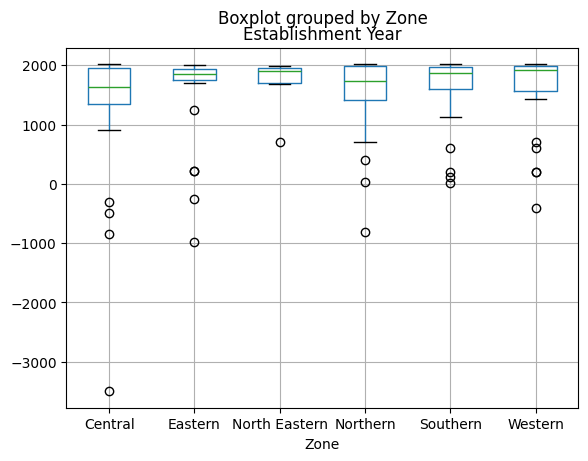

In [100]:
import matplotlib.pyplot as plt


df['Establishment Year'] = pd.to_numeric(df['Establishment Year'], errors='coerce')
df = df.dropna(subset=['Establishment Year'])
df['Establishment Year'] = df['Establishment Year'].astype(int)

def q1(x):
    return x.quantile(0.25)

def q2(x):
    return x.quantile(0.5)

def q3(x):
    return x.quantile(0.75)

def iqr(x):
    return q3(x) - q1(x)

stats = df.groupby('Zone')['Establishment Year'].agg(['min', q1, 'median', q3, 'max', iqr])
print(stats)

df.boxplot(column='Establishment Year', by='Zone')
plt.show()